In [1]:
# importing all the required libraries
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
# importing the csv file containing YT channel data
chdata = pd.read_csv('dia_ytchannel.csv')

In [5]:
# eyeballing the dataframe to see what type of data do we have
chdata.head(5)

,video_id,video_title,upload_date,view_count,like_count,dislike_count,comment_count
0,LOWGBvcqinA,집에서 새벽 스터디윗미🌙자기 전 딱 1시간! 백색소음 Midnight study w...,2023-10-30,349847,8740,0,427
1,L0xhV-slGTQ,Eng) 의대생 Vlog | 국가고시 실기시험을 위한 한 달간의 노력과 역대급 스트...,2023-10-06,251554,13177,0,856
2,8gPNOIgREk8,잘 쉬었으니 이제 공부해야지(요)? D-?? 의대생 스터디윗미 | 도서관에서 같이 ...,2023-10-03,134825,4541,0,227
3,ytoQF_UfsiA,"Eng) 의대생vlog | 방학 없이 태풍 뚫고 학교로,,,오늘도 찢었다🫠 시험기간...",2023-09-22,336728,16392,0,1502
4,M6BXqpIO73g,월화수목금토일 공부❤‍🔥한 달 같은 seven days a week~ #의대생 #브...,2023-08-07,89259,8501,0,215


In [6]:
# gathering more information regarding the data stored in the dataframe
chdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   video_id       48 non-null     object
 1   video_title    48 non-null     object
 2   upload_date    48 non-null     object
 3   view_count     48 non-null     int64 
 4   like_count     48 non-null     int64 
 5   dislike_count  48 non-null     int64 
 6   comment_count  48 non-null     int64 
dtypes: int64(4), object(3)
memory usage: 2.8+ KB


In [9]:
# correcting the data type for upload_date
chdata['upload_date'] = pd.to_datetime(chdata['upload_date'])

In [10]:
# checking to see if data type has been changed
chdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   video_id       48 non-null     object        
 1   video_title    48 non-null     object        
 2   upload_date    48 non-null     datetime64[ns]
 3   view_count     48 non-null     int64         
 4   like_count     48 non-null     int64         
 5   dislike_count  48 non-null     int64         
 6   comment_count  48 non-null     int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 2.8+ KB


In [15]:
# checking for missing values
chdata.isnull().sum()
# no missing values

video_id         0
video_title      0
upload_date      0
view_count       0
like_count       0
dislike_count    0
comment_count    0
dtype: int64

In [17]:
# beginning analysis by calculating the engagement rate
chdata['engagement_rate'] = (chdata['like_count'] + chdata['dislike_count'] + chdata['comment_count']) / chdata['like_count']

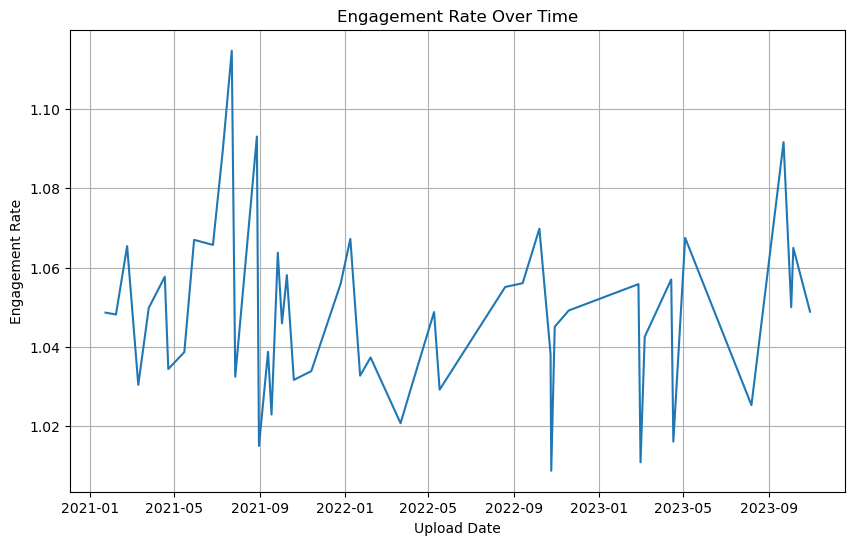

In [28]:
# plotting a line plot for the engagement rate over time
plt.figure(figsize=(10,6))
plt.plot(chdata['upload_date'],chdata['engagement_rate'], linestyle = '-')
plt.title('Engagement Rate Over Time')
plt.xlabel('Upload Date')
plt.ylabel('Engagement Rate')
plt.grid(True)
plt.show()

In [37]:
# figuring out the top performing videos based on engagement rate
top_videos = chdata.nlargest(10,'engagement_rate')
top_videos[['video_title','upload_date','engagement_rate','view_count']]

,video_title,upload_date,engagement_rate,view_count
36,"Sub) 의대생Vlog: 본과 2학년 여유로운 공부, 네컷일기, MBTI, 헌혈, ...",2021-07-23,1.114698,358305
34,"(Eng) 의대생Vlog | 개강이 코앞이쟈나😢 아이패드노트필기 정리, 드디어 운전...",2021-08-28,1.093055,495101
3,"Eng) 의대생vlog | 방학 없이 태풍 뚫고 학교로,,,오늘도 찢었다🫠 시험기간...",2023-09-22,1.091630,336728
37,"Sub) 의대생Vlog | 본과2학년 1학기 마지막까지 밤샘 시험공부 - 안과, 이...",2021-07-10,1.089296,711937
15,"Eng) 의대생 Vlog | 본과3학년, 하루 4시간 수면은 사치 그 잡채☠열심히 ...",2022-10-07,1.069789,584903
5,Eng) 의대생vlog | 본과4학년 발등에 불똥 떨어진 중간고사 시험기간🔥효율적인...,2023-05-04,1.067484,627528
24,Eng) 의대생Vlog | 매일매일 새 역사를 썼던 5일👩‍⚕️9am~6pm강의네버...,2022-01-09,1.067224,635055
39,"Eng) 의대생vlog: 본과2학년 산넘어 산 시험공부 벼락치기, 물리치료 투혼😣 ...",2021-05-30,1.066982,927652
38,Eng) 의대생vlog | 본과2학년 공부 마라톤 달리는 신경계🧠 시험기간 브이로그...,2021-06-26,1.065712,998629
45,"Eng) 의대생 Vlog: 본과2학년 개강준비- 공부/복습, 등산, 네컷일기, 사자...",2021-02-23,1.065400,797165


In [46]:
# calculating summary statistics
avg_engagement_rate = chdata['engagement_rate'].mean()
total_comments = chdata['comment_count'].sum()
total_likes = chdata['like_count'].sum()
total_comments, total_likes, avg_engagement_rate 

(75002, 1653806, 1.0483292746878592)